<h1 style="background-color: #4682B4; font-family: newtimeroman; font-size: 250%; color: white; border-radius: 80px 20px; padding: 25px; text-align: center;">
  <b>ANSUR II Dataset: Predicting Ethnic Origin Using Body Measurements and Advanced ML Models</b>
</h1>

### Overview of the ANSUR II Dataset: Ethnic Origin Prediction

#### 1. General Overview:
- The **ANSUR II (Anthropometric Survey of U.S. Army Personnel)** dataset is based on a 2012 survey conducted by the U.S. Army. It includes detailed body measurements from army personnel to assist in research related to equipment design, ergonomics, and physical health assessments.
  
#### 2. Dataset Content:
- **Participants**: The dataset contains information from 4,082 males and 1,986 females.
- **Measurements**: Over 93 direct anthropometric measurements are provided, covering body parts such as the head, arms, legs, torso, and more.
- **Demographic/Administrative Variables**: In addition to body measurements, the dataset includes 15 demographic variables such as age, gender, race, ethnicity, and military branch.

#### 3. Ethnic and Body Measurements Relationship:
- The dataset captures variations in body structures across different ethnic groups due to genetic and environmental factors. These include differences in leg length, head shape, foot measurements, etc., making the dataset suitable for analyzing how body measurements correlate with ethnic origin.

#### 4. Modeling and Prediction:
- This dataset can be used to predict ethnic origin through **classification models**. Algorithms like **Random Forest**, **SVM**, and **XGBoost** can learn patterns from the anthropometric measurements to make predictions about a participant's ethnicity.

#### 5. Applications:
- **Military Use**: The data helps in designing military uniforms, gear, and equipment tailored for comfort, mobility, and safety.
- **Broader Use**: Applications extend to ergonomics, healthcare, and even security systems that can identify individuals' backgrounds based on their physical traits.

---

### Data Fields in the ANSUR II Dataset

- **SubjectID**: Unique identifier for each participant.
- **SubjectsBirthLocation**: Birthplace (U.S. state or foreign country).
- **SubjectNumericRace**: Numeric code representing race: 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American, 6 = Pacific Islander, 8 = Other.
- **Ethnicity**: Self-reported ethnicity, e.g., "Mexican", "Vietnamese".
- **DODRace**: Department of Defense Race Code, similar to `SubjectNumericRace` with identical values for consistency.
- **Gender**: "Male" or "Female".
- **Age**: Participant's age in years.
- **Heightin**: Self-reported height in inches.
- **Weightlbs**: Self-reported weight in pounds.
- **WritingPreference**: Dominant hand for writing; "Right hand", "Left hand", or "Both hands".
- **Date**: The date of measurement, ranging from 2010 to 2012.
- **Installation**: The Army installation where measurements were taken, e.g., "Fort Hood".
- **Component**: Military component such as "Regular Army", "National Guard", or "Army Reserve".
- **Branch**: Army branch, either "Combat Arms", "Combat Support", or "Combat Service Support".
- **PrimaryMOS**: Primary Military Occupational Specialty.

#### Anthropometric Measurements:
- **AbdominalExtensionDepthSitting**: Abdominal extension while sitting.
- **AcromialHeight**: Height to the acromion (shoulder bone).
- **AnkleCircumference**: Circumference of the ankle.
- **ChestCircumference**: Circumference of the chest.
- **FootLength**: Length of the foot.
- **HandLength**: Length of the hand.
- **HeadCircumference**: Circumference of the head.
- **NeckCircumference**: Circumference of the neck.
- **ShoulderLength**: Length of the shoulder.
- **Stature**: Overall height of the participant.
- **Weightlbs**: Weight in pounds.

---

### Key Steps in the Project:

1. **Import Libraries:**
   Essential libraries such as `pandas`, `numpy`, `matplotlib`, `seaborn`, and machine learning frameworks like `sklearn` and `xgboost` will be imported to facilitate data analysis and model building.

2. **Exploratory Data Analysis (EDA):**
   A thorough examination of the dataset will be conducted to analyze the distribution and relationships among variables. This includes visualizing the data to identify patterns and correlations between anthropometric measurements and ethnic origins.

3. **Data Preprocessing:**
   The dataset will be cleaned by handling missing values, encoding categorical variables, and applying scaling techniques where necessary to ensure that all features are on a similar scale for model training.

4. **Train-Test Split:**
   The dataset will be divided into training and testing sets to evaluate the performance of the machine learning models on unseen data, ensuring robust predictions.

5. **Classification Models:**
   Several classification algorithms will be implemented, including:
   - **Logistic Regression**
   - **Support Vector Machine (SVM)**
   - **Random Forest**
   - **Decision Tree**
   - **XGBoost**

6. **Model Evaluation:**
   Performance metrics such as accuracy, precision, recall, and F1 score will be utilized to evaluate and compare the models. Cross-validation techniques will enhance the reliability of the results.

7. **SMOTE for Imbalanced Classes:**
   To address potential class imbalances in the dataset, the Synthetic Minority Over-sampling Technique (SMOTE) will be applied, especially if certain ethnic groups are underrepresented in the data.

8. **Feature Importance & SHAP:**
   SHAP (SHapley Additive exPlanations) will be used to interpret the model predictions and understand which features contribute most significantly to the classification of ethnic origin, providing insights into the model's decision-making process.


---

### Conclusion
- This project aims to predict ethnic origin using the ANSUR II dataset's anthropometric measurements, leveraging machine learning models. The insights gained from the predictions can aid in improving the ergonomics and design of military equipment while also extending to broader applications such as product design and security.


# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf
import shap

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import make_scorer, log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from yellowbrick.classifier import ClassPredictionError, ROCAUC

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [3]:
df1 = pd.read_csv("MALE_Public.csv", encoding="latin-1", low_memory=True)
df1.head()

subjectid  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0      10027                             266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1      10032                             233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2      10033                             287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3      10092                           

In [4]:
df2 = pd.read_csv("FEMALE_Public.csv", encoding="latin-1", low_memory=True)
df2.head()

SubjectId  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0      10037                             231            1282                    301                 204          1180                      222               177                373                        315               263               466                  65               338                        301                 141                  1011           223            836                587                     476                360             1336           274                 922         245         1095           759                    557                             310          35         65             16              220               713                     91         246                        316                         265                    517                432                 1028           75                182         184          141                548         191                     314           69         345                388                 966   
1      10038                             194            1379                    320                 207          1292                      225               178                372                        272               250               430                  64               294                        270                 126                   893           186            900                583                     483                350             1440           261                 839         206         1234           835                    549                             329          32         60             23              208               726                     91         249                        341                         247                    468                463                 1117           78                187         189          138                535         180                     307           60         315                335                1048   
2      10042                             183            1369                    329                 233          1271                      237               196                397                        300               276               450                  69               309                        270                 128                   987           204            861                583                     466                384             1451           287                 874         223         1226           821                    643                             374          36         65             26              204               790                    100         265                        343                         262                    488                469                 1060           84                198         195          146                588         207                     331           70         356                399                1043   
3      10043                           

In [5]:
df2.rename(columns={'SubjectId':'subjectid'}, inplace=True)

In [6]:
data = pd.concat([df1,df2], axis=0, ignore_index=True)
df = data.copy()
df.head()

subjectid  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0      10027                             266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1      10032                             233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2      10033                             287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3      10092                           

In [7]:
pd.set_option("display.max_rows", 5000)

pd.set_option("display.max_columns", 5000)

In [8]:
df.shape

(6068, 108)

In [9]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [10]:
df.isnull().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [11]:
df.describe().T

count          mean           std      min       25%      50%       75%       max
subjectid                       6068.0  20757.198418  13159.390894  10027.0  14841.75  20063.5  27234.50  920103.0
abdominalextensiondepthsitting  6068.0    246.468688     37.400106    155.0    219.00    242.0    271.00     451.0
acromialheight                  6068.0   1406.161338     79.091048   1115.0   1350.00   1410.0   1462.00    1683.0
acromionradialelength           6068.0    327.374423     20.720018    249.0    313.00    328.0    341.25     393.0
anklecircumference              6068.0    224.891397     16.051833    156.0    214.00    225.0    235.00     293.0
axillaheight                    6068.0   1299.608767     72.022286   1038.0   1249.00   1302.0   1349.00    1553.0
balloffootcircumference         6068.0    244.192650     16.845020    186.0    232.00    245.0    256.00     306.0
balloffootlength                6068.0    194.754614     13.516368    151.0    185.00    195.0    204.00     245.0
biacromialbreadth               6068.0    399.204186     30.236914    283.0    376.00    404.0    421.00     489.0
bicepscircumferenceflexed       6068.0    340.934245     41.519866    216.0    311.00    341.0    370.00     490.0
bicristalbreadth                6068.0    274.735003     19.221034    197.0    262.00    274.0    288.00     362.0
bideltoidbreadth                6068.0    490.754450     42.135535    357.0    460.00    492.0    520.00     637.0
bimalleolarbreadth              6068.0     72.252637      5.344590     55.0     68.00     72.0     76.00      91.0
bitragionchinarc                6068.0    324.896506     17.087501    267.0    314.00    326.0    336.00     385.0
bitragionsubmandibulararc       6068.0    306.636124     20.794166    245.0    292.00    307.0    321.00     390.0
bizygomaticbreadth              6068.0    139.723467      7.308457    116.0    135.00    140.0    145.00     174.0
buttockcircumference            6068.0   1020.084707     76.422643    737.0    968.00   1017.0   1068.00    1341.0
buttockdepth                    6068.0    241.619974     26.482986    168.0    222.00    241.0    259.00     349.0
buttockheight                   6068.0    870.152274     54.822574    656.0    832.00    868.0    906.25    1080.0
buttockkneelength               6068.0    608.999176     33.792839    466.0    586.00    609.0    632.00     736.0
buttockpopliteallength          6068.0    497.097561     29.082390    367.0    477.00    497.0    517.00     605.0
calfcircumference               6068.0    386.041200     30.647180    266.0    364.75    385.0    406.00     523.0
cervicaleheight                 6068.0   1477.490442     84.323707   1184.0   1418.00   1484.0   1537.00    1738.0
chestbreadth                    6068.0    282.859097     20.659397    213.0    268.00    283.0    297.00     363.0
chestcircumference              6068.0   1022.098879    100.671751    695.0    949.00   1020.5   1092.00    1469.0
chestdepth                      6068.0    251.738464     26.777843    170.0    233.00    251.0    270.00     383.0
chestheight                     6068.0   1252.013184     79.583972    984.0   1196.00   1259.0   1309.00    1506.0
crotchheight                    6068.0    825.110086     54.748240    610.0    787.00    825.0    863.00    1031.0
crotchlengthomphalion           6068.0    621.851681     45.332961    473.0    590.00    620.0    651.00     799.0
crotchlengthposterioromphalion  6068.0    351.315920     29.944868    243.0    330.00    350.0    372.00     468.0
earbreadth                      6068.0     35.132169      3.231469     25.0     33.00     35.0     37.00      46.0
earlength                       6068.0     62.625906      4.876264     46.0     59.00     62.0     66.00      81.0
earprotrusion                   6068.0     22.263349      3.172715     13.0     20.00     22.0     24.00      34.0
elbowrestheight                 6068.0    240.911338     28.509447    138.0    222.00    241.0    261.00     345.0
eyeheigh

In [12]:
df.duplicated().sum() 

0

## Feature to Drop Beforehand

SubjectId: No predictive power

Ethnicity: Many null

SubjectNumericRace: Too messy (Can be multidigit + competitor to target (DODRace))

Date: No predictive power

Installation: No predictive power

Heightin: stature feature exists

Weightlbs: weightkg feature exists

SubjectsBirthLocation

WritingPreference : irrelevant

PrimaryMOS: Primary Military Occupational Specialty. (irrelevant)

In [13]:
df.drop(["subjectid", "SubjectNumericRace", "Heightin", "Weightlbs", "WritingPreference", "Installation", "Date", "Ethnicity", "PrimaryMOS"], axis=1, inplace=True)

## DODRace

In [14]:
df["DODRace"].unique()

array([1, 2, 3, 4, 5, 6, 8], dtype=int64)

In [15]:
df.DODRace.value_counts()

DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

In [16]:
df = df[df.DODRace.isin([1, 2, 3])]

### 1 == "White"
### 2 == "Black"
### 3 == "Hispanic"

In [17]:
race_labels = {
    1: "White",
    2: "Black",
    3: "Hispanic"
}

In [18]:
df["Race"] = df["DODRace"].map(race_labels)

In [19]:
df.drop(["DODRace"], axis=1, inplace=True)

In [20]:
print(df["Race"].value_counts().index)

Index(['White', 'Black', 'Hispanic'], dtype='object', name='Race')


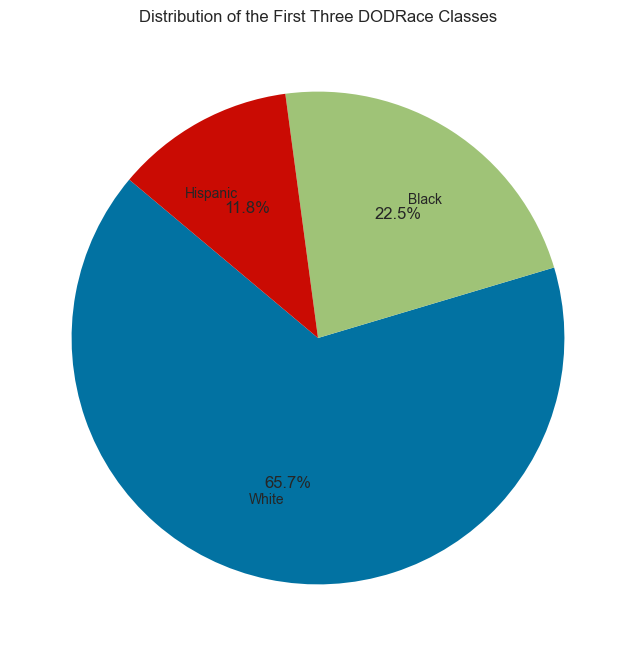

In [21]:
race_names = {'White': 'White', 'Black': 'Black', 'Hispanic': 'Hispanic'}

plt.figure(figsize=(8, 8))
plt.pie(df["Race"].value_counts(), 
        labels=df["Race"].value_counts().index, 
        autopct='%1.1f%%', 
        startangle=140, labeldistance=0.67)
plt.title('Distribution of the First Three DODRace Classes')
plt.show()

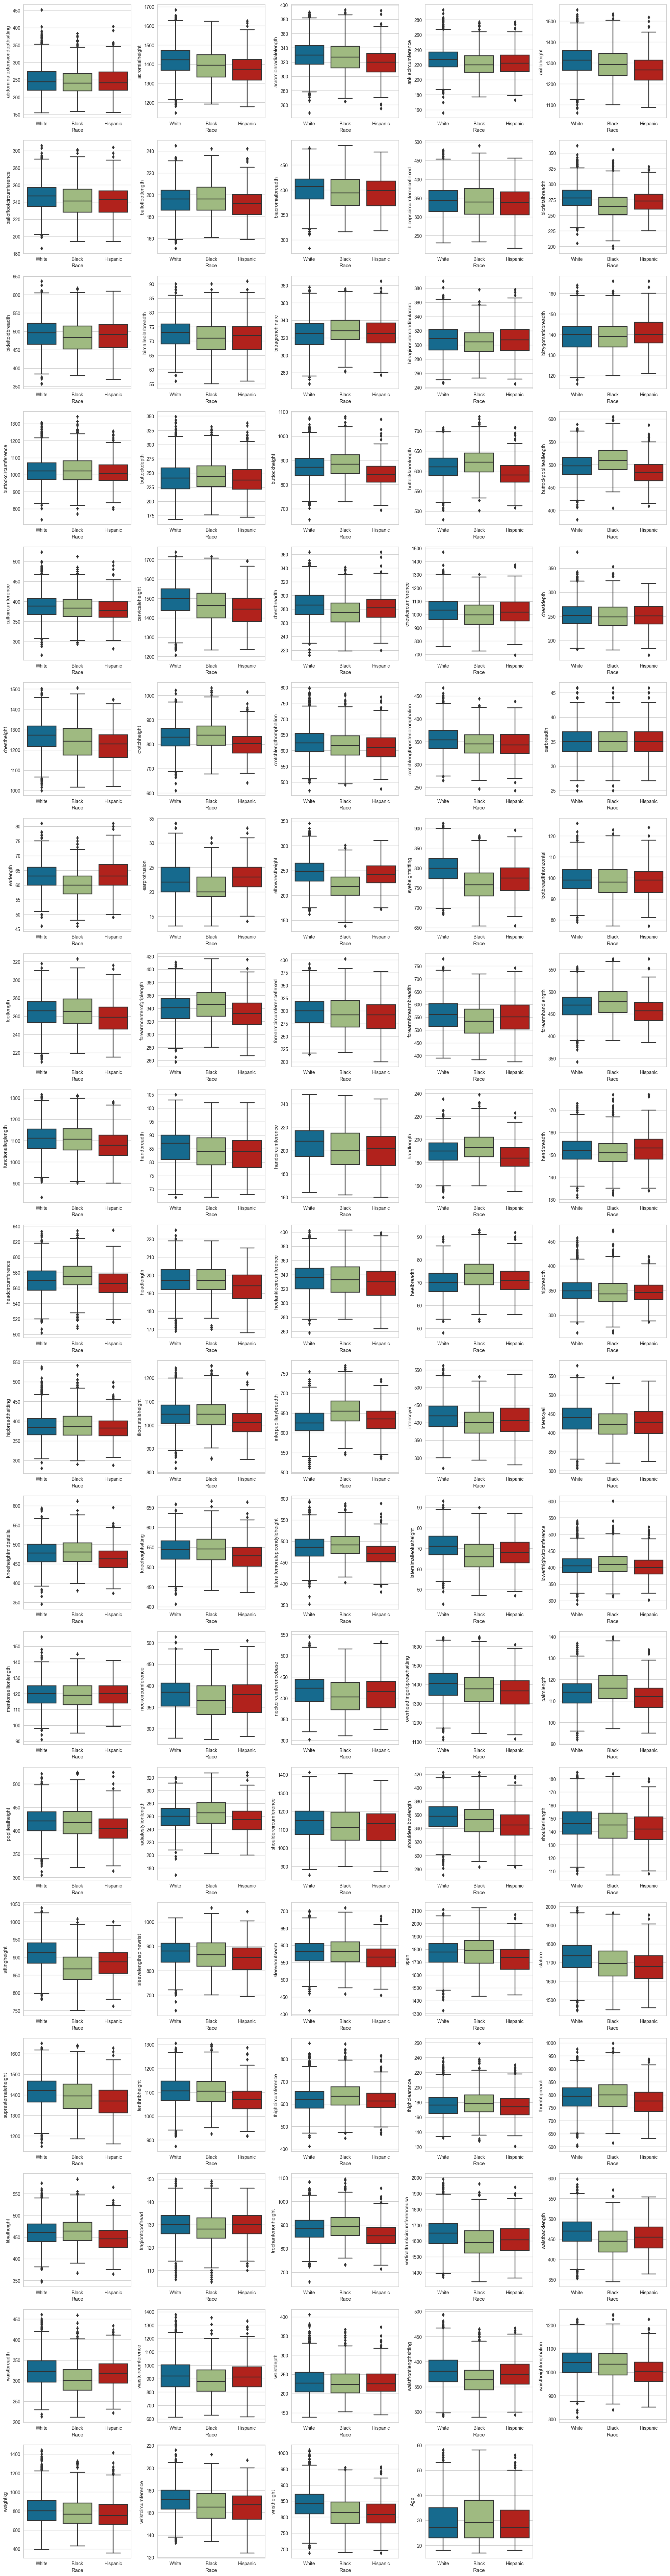

In [22]:
fig = plt.figure(figsize=(20,80))

for i, col in enumerate(df.select_dtypes(include=np.number)):
        plt.subplot(20,5,i+1)
        ax = sns.boxplot(x="Race", y=df[col], data=df)
        
plt.tight_layout();

## Numeric Columns

In [23]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

In [24]:
numeric_df.head()

abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0                             266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1                             233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2                             287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3                             234            1347                    310           

## Component

In [25]:
df["Component"].unique()

array(['Regular Army', 'Army National Guard', 'Army Reserve'],
      dtype=object)

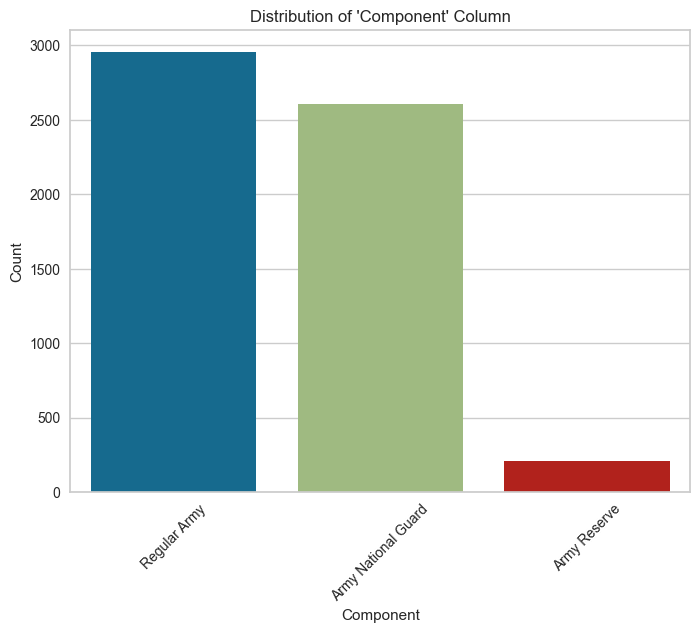

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Component', data=df)
plt.title("Distribution of 'Component' Column")
plt.xlabel("Component")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## Gender

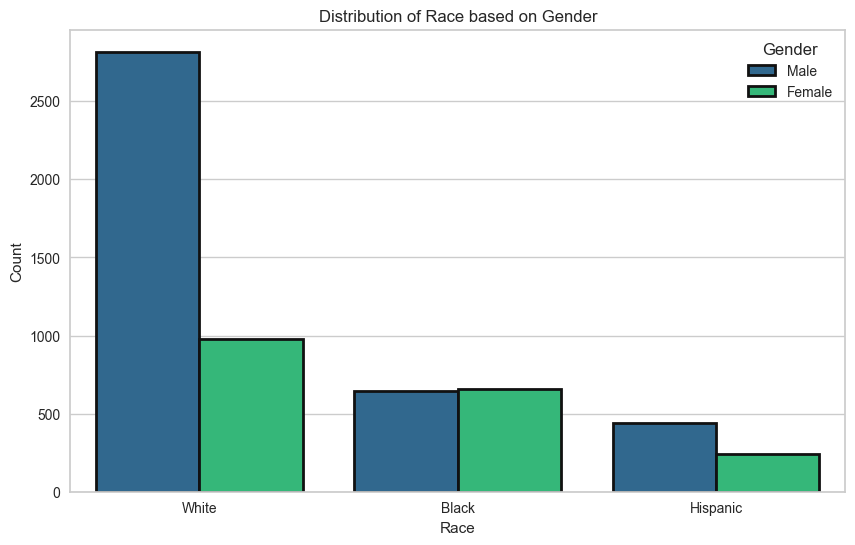

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Race", hue="Gender", saturation=1, edgecolor='k',
              linewidth=2, palette='viridis')
plt.title(f'Distribution of Race based on Gender')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

In [28]:
df["Male"] = df["Gender"].map({"Male": 1, "Female": 0})

In [29]:
df.drop(columns=["Gender"], inplace=True)

## Branch

In [30]:
df["Branch"].unique()

array(['Combat Arms', 'Combat Support', 'Combat Service Support'],
      dtype=object)

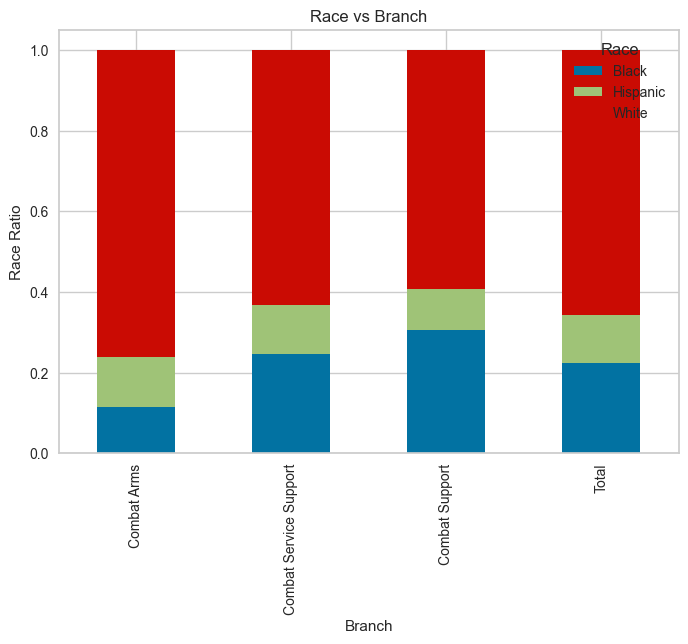

In [31]:
brun_vs_dod = pd.crosstab( df.Branch,df.Race, margins=True, margins_name="Total", normalize='index')
brun_vs_dod.plot(kind='bar', stacked=True)
plt.title('Race vs Branch')
plt.xlabel('Branch')
plt.ylabel('Race Ratio')
plt.show()

## Age 

<Axes: xlabel='Age', ylabel='Count'>

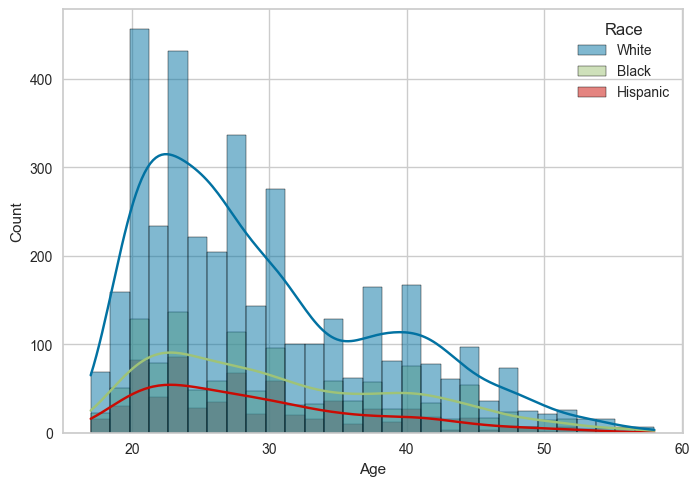

In [32]:
sns.histplot(x=df.Age ,hue=df.Race, kde=True)

<Axes: xlabel='Age'>

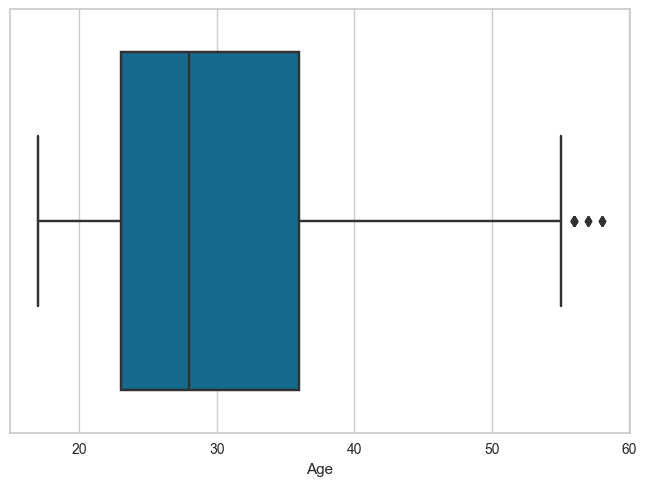

In [33]:
sns.boxplot(x=df.Age, hue=df.Race)

## Checking Outliers

In [34]:
def format_row_based_on_comparison(row):
    if row.iloc[2] >= row.iloc[1]:
        return ['color: red'] * len(row)
    elif row.iloc[7] > (row.iloc[6] + (row.iloc[6] - row.iloc[4]) * 1.5) or row.iloc[3] < (row.iloc[4] - (row.iloc[6] - row.iloc[4]) * 1.5):
        return ['color: orange'] * len(row)
    else:
        return [''] * len(row)

In [36]:
df = df.reset_index(drop=True)

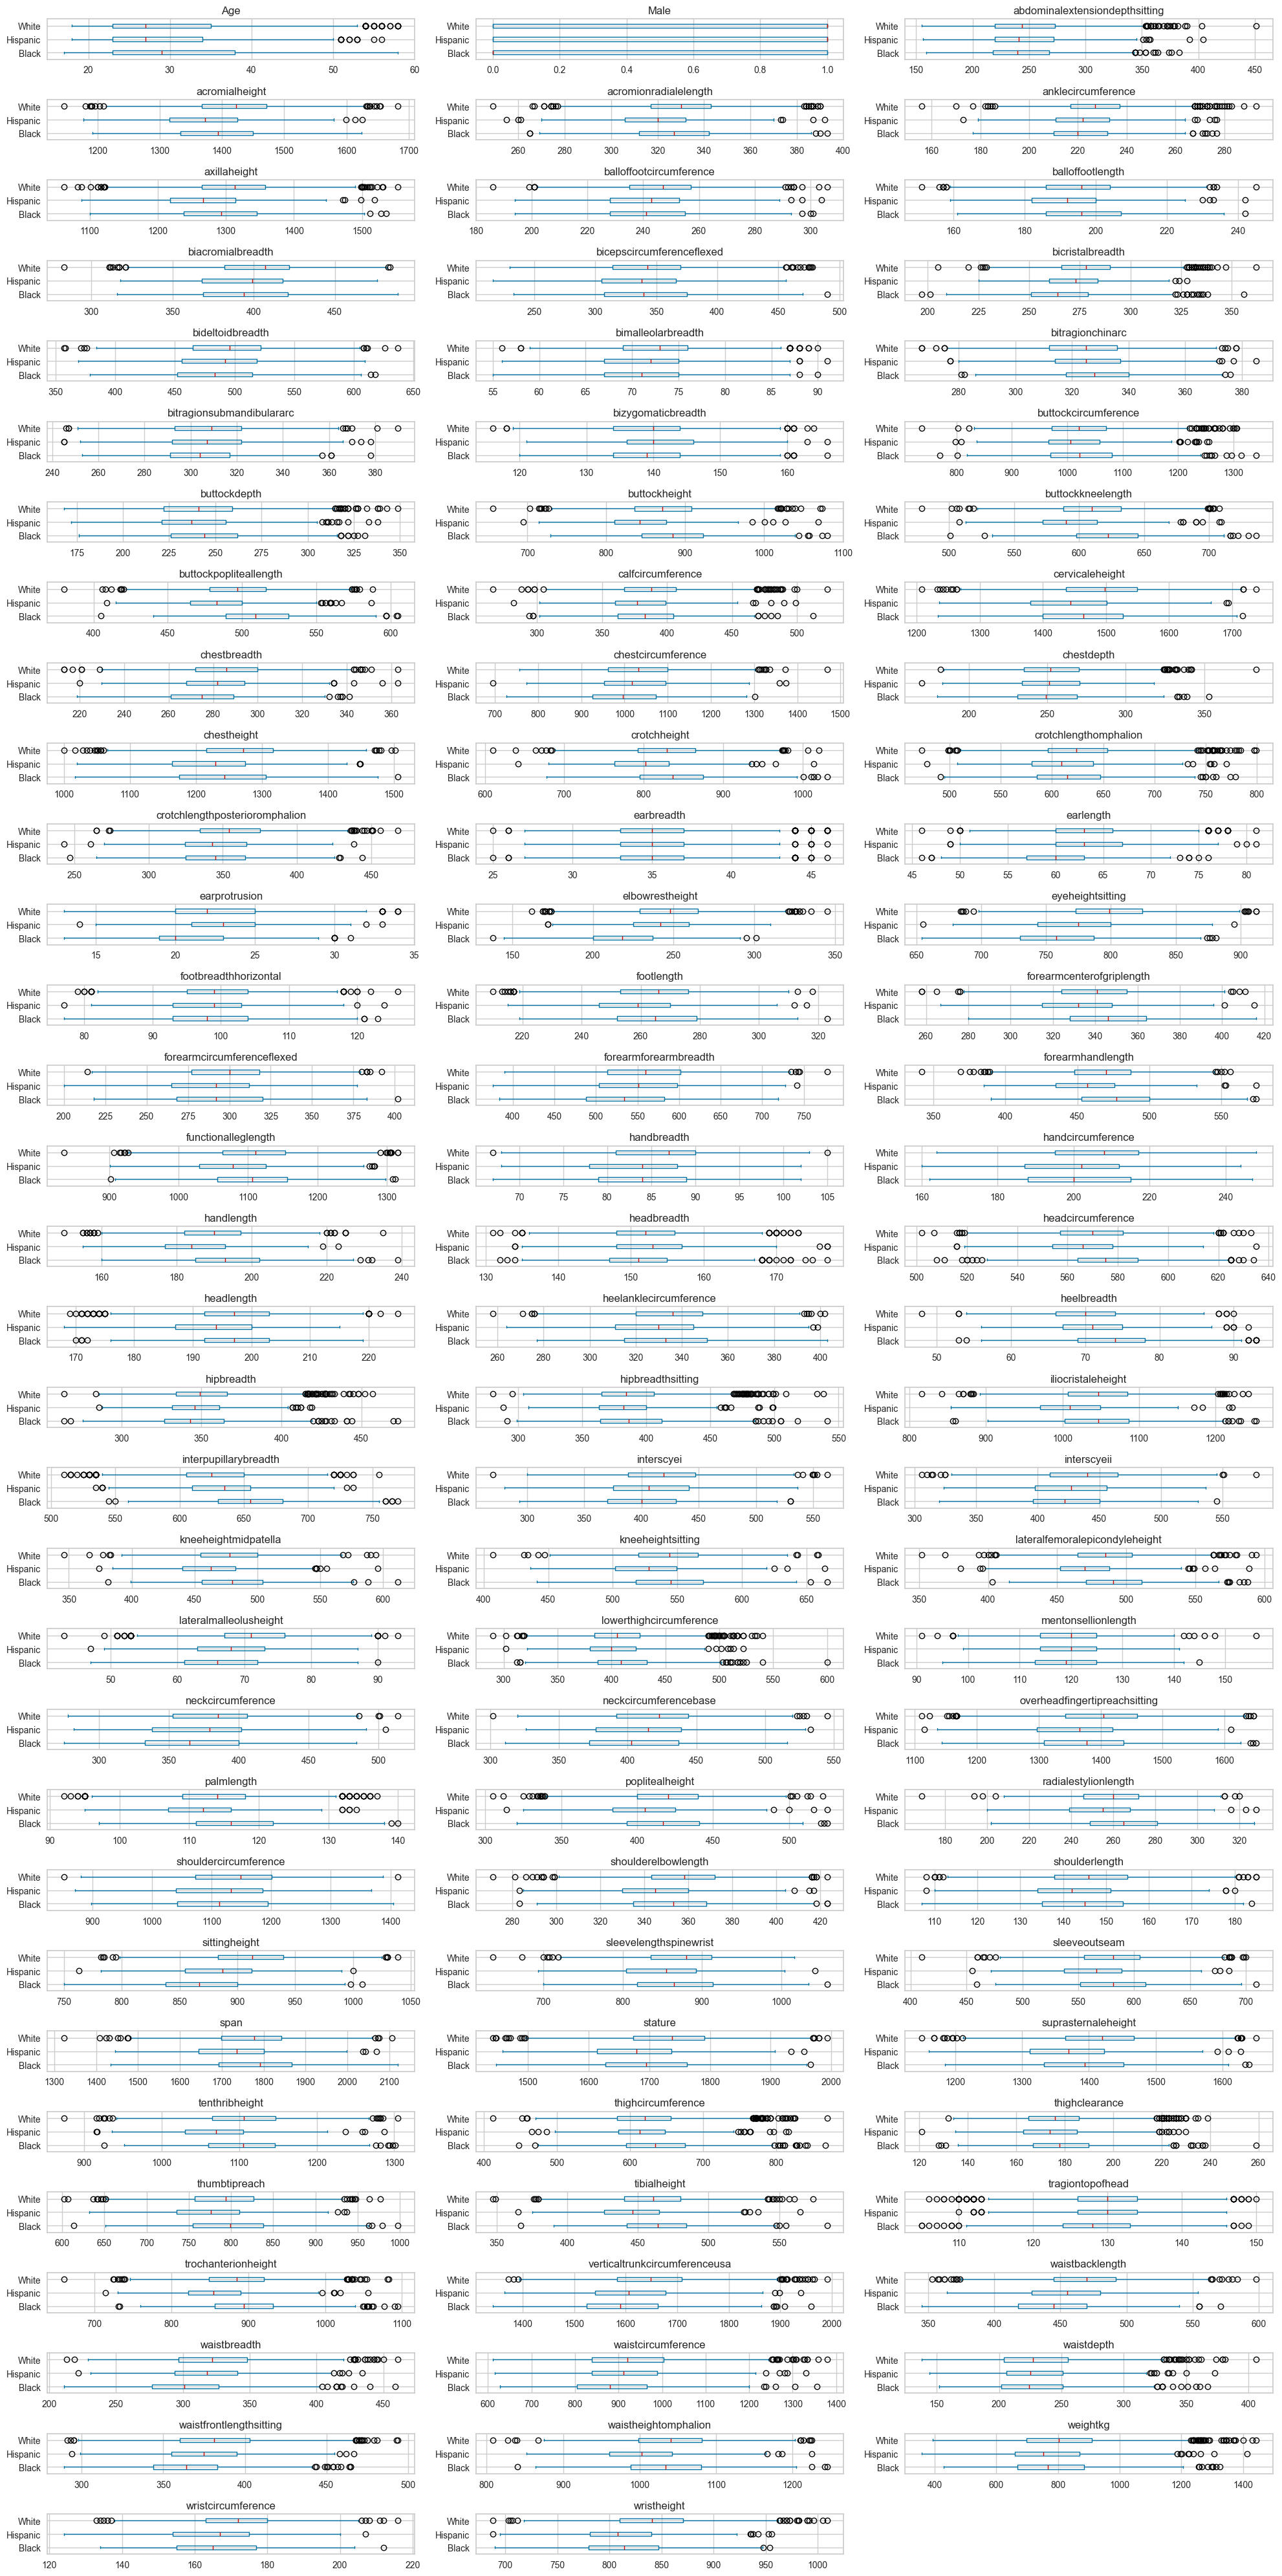

In [37]:
df.plot(by='Race', kind='box', subplots=True, layout=(32, 3),
        figsize=(20, 40), vert=False, sharex=False, sharey=False)
plt.tight_layout()

Since the values represent real measurements, the impact of outliers should not be significant; therefore, we will not remove them.

To handle outliers, the MinMax scaler will be applied.

## Checking Multicolinearity

In [40]:
def high_correlation(df, threshold=0.92):
    
    numeric_df = df.select_dtypes(include=[np.number])
    
    corr_matrix = numeric_df.corr()
    
    high_corr_var = np.where(np.abs(corr_matrix) > threshold)
    
    high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y], corr_matrix.values[x, y]) 
                     for x, y in zip(*high_corr_var) 
                     if x != y and x < y]

    high_corr_df = pd.DataFrame(high_corr_var, columns=['Column 1', 'Column 2', 'Correlation'])
    
    return high_corr_df

high_corr_df = high_correlation(df)
print(high_corr_df)

                          Column 1                        Column 2  Correlation
0   abdominalextensiondepthsitting              waistcircumference     0.939645
1   abdominalextensiondepthsitting                      waistdepth     0.958716
2                   acromialheight                    axillaheight     0.987115
3                   acromialheight                 cervicaleheight     0.983955
4                   acromialheight                     chestheight     0.959300
5                   acromialheight              iliocristaleheight     0.932232
6                   acromialheight               kneeheightsitting     0.931762
7                   acromialheight                         stature     0.979925
8                   acromialheight             suprasternaleheight     0.984711
9                   acromialheight                  tenthribheight     0.945019
10                  acromialheight            waistheightomphalion     0.930954
11                  acromialheight      

# DATA Preprocessing

In [41]:
X = df.drop(columns= ["Race"])
y = df.Race

In [42]:
cat_columns = list(X.select_dtypes(include=['object']).columns)
cat_columns

['Component', 'Branch', 'SubjectsBirthLocation']

In [43]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

column_trans = make_column_transformer((
               OneHotEncoder(handle_unknown="ignore", sparse_output=False), 
               cat_columns),
               remainder="passthrough", 
               verbose_feature_names_out=False).set_output(transform="pandas")

In [44]:
X = column_trans.fit_transform(X)

In [45]:
features = column_trans.get_feature_names_out()
X= pd.DataFrame(X, columns=features)
X.head()

Component_Army National Guard  Component_Army Reserve  Component_Regular Army  Branch_Combat Arms  Branch_Combat Service Support  Branch_Combat Support  SubjectsBirthLocation_Alabama  SubjectsBirthLocation_Alaska  SubjectsBirthLocation_Antigua and Barbuda  SubjectsBirthLocation_Argentina  SubjectsBirthLocation_Arizona  SubjectsBirthLocation_Arkansas  SubjectsBirthLocation_Azerbaijan  SubjectsBirthLocation_Bahamas  SubjectsBirthLocation_Barbados  SubjectsBirthLocation_Belarus  SubjectsBirthLocation_Belgium  SubjectsBirthLocation_Belize  SubjectsBirthLocation_Bermuda  SubjectsBirthLocation_Bolivia  SubjectsBirthLocation_Bosnia and Herzegovina  SubjectsBirthLocation_Brazil  SubjectsBirthLocation_British Virgin Islands  SubjectsBirthLocation_Bulgaria  SubjectsBirthLocation_California  SubjectsBirthLocation_Cameroon  SubjectsBirthLocation_Canada  SubjectsBirthLocation_Cape Verde  SubjectsBirthLocation_Chile  SubjectsBirthLocation_Colombia  SubjectsBirthLocation_Colorado  \
0                            0.0                     0.0                     1.0                 1.0                            0.0                    0.0                            0.0                           0.0                                        0.0                              0.0                            0.0                             0.0                               0.0                            0.0                             0.0                            0.0                            0.0                           0.0                            0.0                            0.0                                           0.0                           0.0                                           0.0                             0.0                               0.0                             0.0                           0.0                               0.0                          0.0                             0.0                             0.0   
1                            0.0                     0.0                     1.0                 0.0                            0.0                    1.0                            0.0                           0.0                                        0.0                              0.0                            0.0                             0.0                               0.0                            0.0                             0.0                            0.0                            0.0                           0.0                            0.0                            0.0                                           0.0                           0.0                                           0.0                             0.0                               0.0                             0.0                           0.0                               0.0                          0.0                             0.0                             0.0   
2                            0.0                     0.0                     1.0                 0.0                            0.0                    1.0                            0.0                           0.0                                        0.0                              0.0                            0.0                             0.0                               0.0                            0.0                             0.0                            0.0                            0.0                           0.0                            0.0                            0.0                                           0.0                           0.0                                           0.0                             0.0                               0.0                             0.0                           0.0                               0.0                          0.0                             0.0                             0.0   
3                            0.0                     0.0   

In [46]:
numeric_columns = list(X.select_dtypes(include=["number"]).columns)

In [47]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

# MODELLING

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [49]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 237)
Train target shape   :  (4615,)
Test features shape  :  (1154, 237)
Test target shape    :  (1154,)


# Logistic Model

In [50]:
log_pipe = Pipeline([
    ('scaler', StandardScaler()),             
    ('log_reg', LogisticRegression())         
])

In [51]:
log_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [52]:
y_pred_train = log_pipe.predict(X_train)
y_pred_test = log_pipe.predict(X_test)

In [53]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [54]:
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print("Train Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train))
print("\nTrain Set Classification Report:")
print(classification_report(y_train, y_pred_train))

print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("Test Set Classification Report:")
print(classification_report(y_test, y_pred_test))

Train Accuracy: 0.9242
Test Accuracy: 0.9029
Train Confusion Matrix:
[[ 980    7   51]
 [  21  347  175]
 [  27   69 2938]]

Train Set Classification Report:
              precision    recall  f1-score   support

       Black       0.95      0.94      0.95      1038
    Hispanic       0.82      0.64      0.72       543
       White       0.93      0.97      0.95      3034

    accuracy                           0.92      4615
   macro avg       0.90      0.85      0.87      4615
weighted avg       0.92      0.92      0.92      4615

Test Confusion Matrix:
[[240   6  14]
 [  6  76  54]
 [  5  27 726]]
Test Set Classification Report:
              precision    recall  f1-score   support

       Black       0.96      0.92      0.94       260
    Hispanic       0.70      0.56      0.62       136
       White       0.91      0.96      0.94       758

    accuracy                           0.90      1154
   macro avg       0.86      0.81      0.83      1154
weighted avg       0.90      0.90 

In [55]:
scoring = {
    "precision_Hispanic": make_scorer(precision_score, average='macro', pos_label="Hispanic"),
    "recall_Hispanic": make_scorer(recall_score, average='macro', pos_label="Hispanic"),
    "f1_Hispanic": make_scorer(f1_score, average='macro', pos_label="Hispanic")
}

In [56]:
scores = cross_validate(log_pipe, X_train, y_train, scoring = scoring, cv =14, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 15))
df_scores.mean()[2:]

test_precision_Hispanic     0.855018
train_precision_Hispanic    0.903274
test_recall_Hispanic        0.808634
train_recall_Hispanic       0.853320
test_f1_Hispanic            0.826391
train_f1_Hispanic           0.874534
dtype: float64

## Weighted Class 3

In [57]:
log_reg = LogisticRegression(
    class_weight={"White": 1, "Black": 1, "Hispanic": 10},  
    max_iter=1000
)

pipeline = Pipeline([
    ("scaler", StandardScaler()),  
    ("classifier", log_reg) 
])


In [58]:
cv_results = cross_validate(pipeline, X, y, cv=5, scoring=["accuracy", "f1_macro"], return_train_score=True)

In [59]:
print(f"Test Accuracy Scores: {cv_results['test_accuracy']}")
print(f"Mean Test Accuracy: {cv_results['test_accuracy'].mean():.4f}")

print(f"Test F1 Scores: {cv_results['test_f1_macro']}")
print(f"Mean Test F1 Score: {cv_results['test_f1_macro'].mean():.4f}")

print(f"Training Accuracy Scores: {cv_results['train_accuracy']}")
print(f"Mean Training Accuracy: {cv_results['train_accuracy'].mean():.4f}")

print(f"Training F1 Scores: {cv_results['train_f1_macro']}")
print(f"Mean Training F1 Score: {cv_results['train_f1_macro'].mean():.4f}")

Test Accuracy Scores: [0.79462738 0.83535529 0.77816291 0.72010399 0.67476149]
Mean Test Accuracy: 0.7606
Test F1 Scores: [0.74728653 0.76333371 0.73219447 0.68081599 0.66468378]
Mean Test F1 Score: 0.7177
Training Accuracy Scores: [0.84637053 0.85070423 0.85698808 0.85330444 0.84878683]
Mean Training Accuracy: 0.8512
Training F1 Scores: [0.8064182  0.81318796 0.81648644 0.81675151 0.81178714]
Mean Training F1 Score: 0.8129


In [60]:
pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

In [61]:
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

print(f"Training F1 Score: {f1_score(y_train, y_train_pred, average='macro'):.4f}")
print(f"Test F1 Score: {f1_score(y_test, y_test_pred, average='macro'):.4f}")

Training Accuracy: 0.8446
Test Accuracy: 0.8172
Training F1 Score: 0.8059
Test F1 Score: 0.7694


## Grid searchCV

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [63]:
log_reg = LogisticRegression(max_iter=1000)

param_grid = {
    "classifier__C": [0.1, 1, 10], 
    "classifier__penalty": ["l1", "l2"],  
    "classifier__solver": ["liblinear", "saga"] 
}

In [64]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", log_reg)
])

In [65]:
log_gridmodel = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  
    scoring="accuracy",  
    verbose=1,  
    n_jobs=-1  
)

In [66]:
log_gridmodel.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [67]:
print("Best parameters found: ", log_gridmodel.best_params_)

Best parameters found:  {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}


In [68]:
best_model = log_gridmodel.best_estimator_

In [69]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [70]:
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Train Classification Report:
              precision    recall  f1-score   support

       Black       0.94      0.93      0.94      1038
    Hispanic       0.86      0.58      0.70       543
       White       0.92      0.97      0.94      3034

    accuracy                           0.92      4615
   macro avg       0.91      0.83      0.86      4615
weighted avg       0.92      0.92      0.91      4615

Test Classification Report:
              precision    recall  f1-score   support

       Black       0.96      0.92      0.94       260
    Hispanic       0.76      0.54      0.64       136
       White       0.91      0.97      0.94       758

    accuracy                           0.91      1154
   macro avg       0.88      0.81      0.84      1154
weighted avg       0.90      0.91      0.90      1154



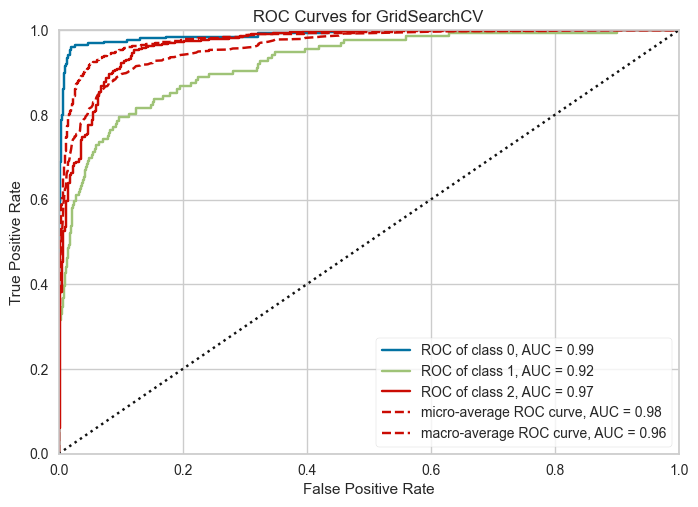

In [71]:
visualizer = ROCAUC(log_gridmodel, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show();

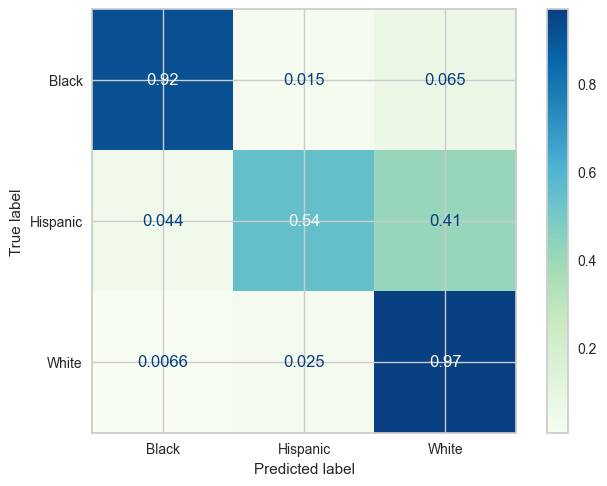

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    log_gridmodel,  
    X_test,
    y_test,
    normalize='true',
    cmap='GnBu'
)

plt.show()

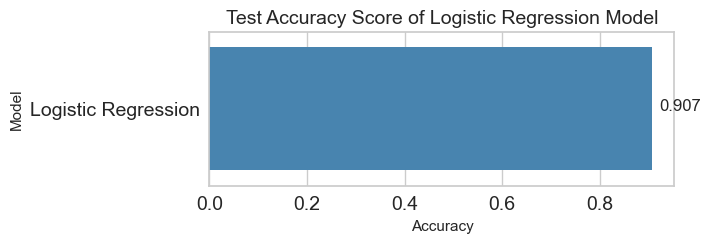

In [73]:
lg_accuracy = log_gridmodel.score(X_test, y_test)

compare_lg = pd.DataFrame({
    "Model": ["Logistic Regression"],
    "Accuracy": [lg_accuracy]
})

plt.figure(figsize=(6, 2))
ax = sns.barplot(x="Accuracy", y="Model", data=compare_lg, palette="Blues_d")

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.5),
                xytext=(5, 10), textcoords='offset points')

plt.yticks(size=14)
plt.xticks(size=14)
plt.title("Test Accuracy Score of Logistic Regression Model", size=14)
plt.show()

# SVM Classifier

In [74]:
column_transformer = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_columns)
    ],
    remainder="passthrough" 
)

In [75]:
pipe_svm = Pipeline(steps=[
    ("preprocessor", column_transformer),  
    ("svm", SVC())                         
])

pipe_svm.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Component_Army National '
                                                   'Guard',
                                                   'Component_Army Reserve',
                                                   'Component_Regular Army',
                                                   'Branch_Combat Arms',
                                                   'Branch_Combat Service '
                                                   'Support',
                                                   'Branch_Combat Support',
                                                   'SubjectsBirthLocation_Alabama',
                                                   'SubjectsBirthLocation_Alaska',
                                                   'SubjectsBirthLocat...
                                                   'and Herzegovina',
                                                   'SubjectsBirthLocation_Brazil',
                                                   'SubjectsBirthLocation_British '
                                                   'Virgin Islands',
                                                   'SubjectsBirthLocation_Bulgaria',
                                                   'SubjectsBirthLocation_California',
                                                   'SubjectsBirthLocation_Cameroon',
                                                   'SubjectsBirthLocation_Canada',
                                                   'SubjectsBirthLocation_Cape '
                                                   'Verde',
                                                   'SubjectsBirthLocation_Chile',
                                                   'SubjectsBirthLocation_Colombia', ...])])),
                ('svm', SVC())])

In [76]:
y_pred = pipe_svm.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[227   2  31]
 [  4  51  81]
 [  5   8 745]]
              precision    recall  f1-score   support

       Black       0.96      0.87      0.92       260
    Hispanic       0.84      0.38      0.52       136
       White       0.87      0.98      0.92       758

    accuracy                           0.89      1154
   macro avg       0.89      0.74      0.79      1154
weighted avg       0.89      0.89      0.87      1154



In [77]:
eval_metric(pipe_svm, X_train, y_train, X_test, y_test)

Test_Set
[[227   2  31]
 [  4  51  81]
 [  5   8 745]]
              precision    recall  f1-score   support

       Black       0.96      0.87      0.92       260
    Hispanic       0.84      0.38      0.52       136
       White       0.87      0.98      0.92       758

    accuracy                           0.89      1154
   macro avg       0.89      0.74      0.79      1154
weighted avg       0.89      0.89      0.87      1154


Train_Set
[[ 953    5   80]
 [  20  267  256]
 [   8   14 3012]]
              precision    recall  f1-score   support

       Black       0.97      0.92      0.94      1038
    Hispanic       0.93      0.49      0.64       543
       White       0.90      0.99      0.94      3034

    accuracy                           0.92      4615
   macro avg       0.93      0.80      0.84      4615
weighted avg       0.92      0.92      0.91      4615



## SVC with GridSeacrh

In [78]:
param_grid = {
    "svm__C": [0.1, 1, 10, 100],           
    "svm__kernel": ["linear", "rbf"],      
    "svm__gamma": ["scale", "auto", 0.1, 1] 
}

In [79]:
svm_model_grid = GridSearchCV(estimator=pipe_svm, param_grid=param_grid, 
                           scoring="accuracy", cv=5, verbose=2, n_jobs=-1)

svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Component_Army '
                                                                          'National '
                                                                          'Guard',
                                                                          'Component_Army '
                                                                          'Reserve',
                                                                          'Component_Regular '
                                                                          'Army',
                                                                          'Branch_Combat '
                                                                          'Arms',
                                                                          'Branch_Combat '
                                                                          'Service '
                                                                          'Support',
                                                                          'Branch_Combat '
                                                                          'Support',
                                                                          'SubjectsBirthLocation_Alabama',
                                                                          'SubjectsB...
                                                                          'SubjectsBirthLocation_California',
                                                                          'SubjectsBirthLocation_Cameroon',
                                                                          'SubjectsBirthLocation_Canada',
                                                                          'SubjectsBirthLocation_Cape '
                                                                          'Verde',
                                                                          'SubjectsBirthLocation_Chile',
                                                                          'SubjectsBirthLocation_Colombia', ...])])),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10, 100],
                         'svm__gamma': ['scale', 'auto', 0.1, 1],
                         'svm__kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=2)

In [80]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[236   8  16]
 [  8  77  51]
 [  5  18 735]]
              precision    recall  f1-score   support

       Black       0.95      0.91      0.93       260
    Hispanic       0.75      0.57      0.64       136
       White       0.92      0.97      0.94       758

    accuracy                           0.91      1154
   macro avg       0.87      0.81      0.84      1154
weighted avg       0.90      0.91      0.90      1154


Train_Set
[[ 973    8   57]
 [  25  334  184]
 [  24   47 2963]]
              precision    recall  f1-score   support

       Black       0.95      0.94      0.94      1038
    Hispanic       0.86      0.62      0.72       543
       White       0.92      0.98      0.95      3034

    accuracy                           0.93      4615
   macro avg       0.91      0.84      0.87      4615
weighted avg       0.92      0.93      0.92      4615



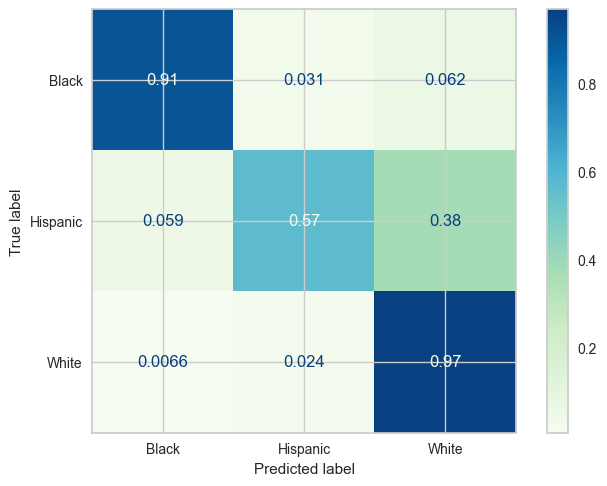

In [81]:
ConfusionMatrixDisplay.from_estimator(svm_model_grid,X_test, y_test,normalize='true', cmap='GnBu');

# Random Forest

In [82]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [84]:
y_pred = rf_model.predict(X_test)

In [85]:
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))
print("\nTraining Accuracy Score:", accuracy_score(y_train, y_train_pred))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nTest Classification Report:")
print(classification_report(y_test, y_pred))
print("\nTest Accuracy Score:", accuracy_score(y_test, y_pred))

Training Confusion Matrix:
[[ 966    7   65]
 [  27  317  199]
 [  35   45 2954]]

Training Classification Report:
              precision    recall  f1-score   support

       Black       0.94      0.93      0.94      1038
    Hispanic       0.86      0.58      0.70       543
       White       0.92      0.97      0.94      3034

    accuracy                           0.92      4615
   macro avg       0.91      0.83      0.86      4615
weighted avg       0.92      0.92      0.91      4615


Training Accuracy Score: 0.9180931744312026

Test Confusion Matrix:
[[191   3  66]
 [  7  17 112]
 [ 11   3 744]]

Test Classification Report:
              precision    recall  f1-score   support

       Black       0.91      0.73      0.81       260
    Hispanic       0.74      0.12      0.21       136
       White       0.81      0.98      0.89       758

    accuracy                           0.82      1154
   macro avg       0.82      0.61      0.64      1154
weighted avg       0.82      0.82 

## RF Model GridsearchCV

In [86]:
param_grid = {
    'n_estimators': [50, 100, 200],        
    'max_features': ['auto', 'sqrt', 'log2'],  
    'max_depth': [None, 10, 20, 30],       
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 4]          
}

In [87]:
rf_gridmodel = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
rf_gridmodel.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [88]:
print("Best Parameters:")
print(rf_gridmodel.best_params_)
print("\nBest Score:")
print(rf_gridmodel.best_score_)

Best Parameters:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Best Score:
0.8223185265438786


In [89]:
best_rf_model = rf_gridmodel.best_estimator_

y_pred = best_rf_model.predict(X_test)

In [90]:
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))
print("\nTraining Accuracy Score:", accuracy_score(y_train, y_train_pred))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nTest Classification Report:")
print(classification_report(y_test, y_pred))
print("\nTest Accuracy Score:", accuracy_score(y_test, y_pred))

Training Confusion Matrix:
[[ 966    7   65]
 [  27  317  199]
 [  35   45 2954]]

Training Classification Report:
              precision    recall  f1-score   support

       Black       0.94      0.93      0.94      1038
    Hispanic       0.86      0.58      0.70       543
       White       0.92      0.97      0.94      3034

    accuracy                           0.92      4615
   macro avg       0.91      0.83      0.86      4615
weighted avg       0.92      0.92      0.91      4615


Training Accuracy Score: 0.9180931744312026

Test Confusion Matrix:
[[190   1  69]
 [  9  14 113]
 [ 11   4 743]]

Test Classification Report:
              precision    recall  f1-score   support

       Black       0.90      0.73      0.81       260
    Hispanic       0.74      0.10      0.18       136
       White       0.80      0.98      0.88       758

    accuracy                           0.82      1154
   macro avg       0.81      0.60      0.62      1154
weighted avg       0.82      0.82 

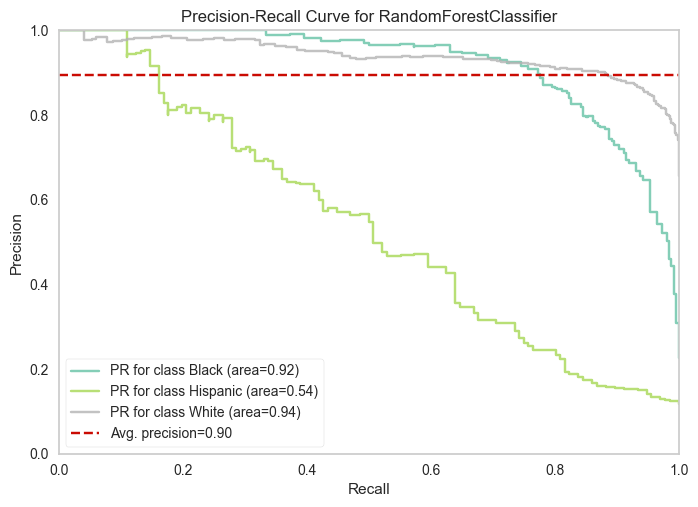

<Axes: title={'center': 'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [91]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    best_rf_model,
    per_class= True, classes= ["Black", "Hispanic", "White"],
    cmap= "Set2"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

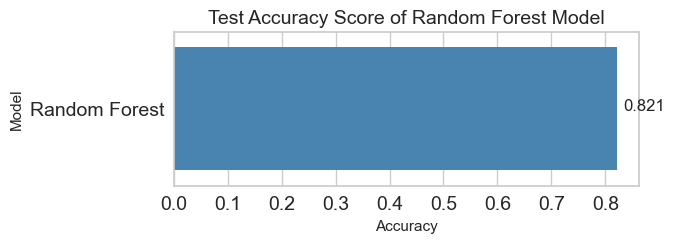

In [92]:
rf_accuracy = rf_gridmodel.score(X_test, y_test)  

compare_rf = pd.DataFrame({
    "Model": ["Random Forest"],
    "Accuracy": [rf_accuracy]
})

plt.figure(figsize=(6, 2))
ax = sns.barplot(x="Accuracy", y="Model", data=compare_rf, palette="Blues_d")

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.5),
                xytext=(5, 10), textcoords='offset points')

plt.yticks(size=14)
plt.xticks(size=14)
plt.title("Test Accuracy Score of Random Forest Model", size=14)
plt.show()

#  Decision Tree Model

In [93]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [94]:
y_pred = dt_model.predict(X_test)

print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))
print("\nTraining Accuracy Score:", accuracy_score(y_train, y_train_pred))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nTest Classification Report:")
print(classification_report(y_test, y_pred))
print("\nTest Accuracy Score:", accuracy_score(y_test, y_pred))

Training Confusion Matrix:
[[ 966    7   65]
 [  27  317  199]
 [  35   45 2954]]

Training Classification Report:
              precision    recall  f1-score   support

       Black       0.94      0.93      0.94      1038
    Hispanic       0.86      0.58      0.70       543
       White       0.92      0.97      0.94      3034

    accuracy                           0.92      4615
   macro avg       0.91      0.83      0.86      4615
weighted avg       0.92      0.92      0.91      4615


Training Accuracy Score: 0.9180931744312026

Test Confusion Matrix:
[[169  31  60]
 [ 23  41  72]
 [ 61  85 612]]

Test Classification Report:
              precision    recall  f1-score   support

       Black       0.67      0.65      0.66       260
    Hispanic       0.26      0.30      0.28       136
       White       0.82      0.81      0.81       758

    accuracy                           0.71      1154
   macro avg       0.58      0.59      0.58      1154
weighted avg       0.72      0.71 

## DT Model with GridSearchCV

In [95]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [96]:
dt_gridmodel = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
dt_gridmodel.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [97]:
print("Best parameters found: ", dt_gridmodel.best_params_)

Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [98]:
best_dt = dt_gridmodel.best_estimator_
y_pred = best_dt.predict(X_test)

In [99]:
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))
print("\nTraining Accuracy Score:", accuracy_score(y_train, y_train_pred))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nTest Classification Report:")
print(classification_report(y_test, y_pred))
print("\nTest Accuracy Score:", accuracy_score(y_test, y_pred))

Training Confusion Matrix:
[[ 966    7   65]
 [  27  317  199]
 [  35   45 2954]]

Training Classification Report:
              precision    recall  f1-score   support

       Black       0.94      0.93      0.94      1038
    Hispanic       0.86      0.58      0.70       543
       White       0.92      0.97      0.94      3034

    accuracy                           0.92      4615
   macro avg       0.91      0.83      0.86      4615
weighted avg       0.92      0.92      0.91      4615


Training Accuracy Score: 0.9180931744312026

Test Confusion Matrix:
[[166  16  78]
 [ 24  32  80]
 [ 46  31 681]]

Test Classification Report:
              precision    recall  f1-score   support

       Black       0.70      0.64      0.67       260
    Hispanic       0.41      0.24      0.30       136
       White       0.81      0.90      0.85       758

    accuracy                           0.76      1154
   macro avg       0.64      0.59      0.61      1154
weighted avg       0.74      0.76 

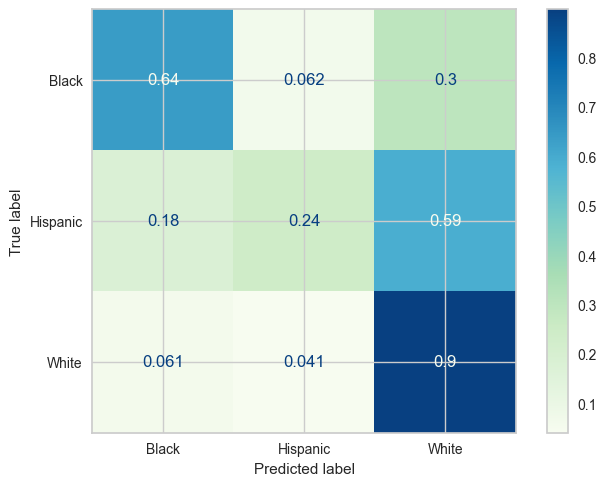

In [100]:
ConfusionMatrixDisplay.from_estimator(dt_gridmodel,X_test, y_test,normalize='true', cmap='GnBu');

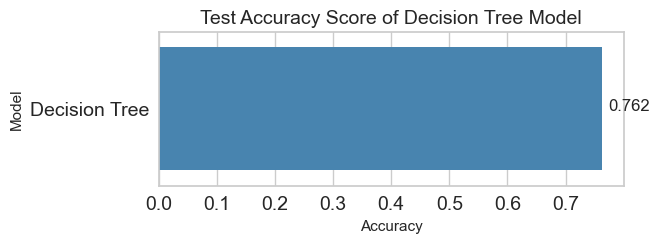

In [101]:
dt_accuracy = dt_gridmodel.score(X_test, y_test)  

compare_dt = pd.DataFrame({
    "Model": ["Decision Tree"],
    "Accuracy": [dt_accuracy]
})

plt.figure(figsize=(6, 2))
ax = sns.barplot(x="Accuracy", y="Model", data=compare_dt, palette="Blues_d")

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.5),
                xytext=(5, 10), textcoords='offset points')

plt.yticks(size=14)
plt.xticks(size=14)
plt.title("Test Accuracy Score of Decision Tree Model", size=14)
plt.show()

# XGBoost

In [102]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [103]:
xgb_model = XGBClassifier(objective='multi:softmax', num_class=3, use_label_encoder=False)

xgb_model.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [104]:
y_pred_encoded = xgb_model.predict(X_test)

In [105]:
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
report = classification_report(y_test_encoded, y_pred_encoded, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.878682842287695
Classification Report:
              precision    recall  f1-score   support

       Black       0.92      0.85      0.88       260
    Hispanic       0.76      0.42      0.54       136
       White       0.88      0.97      0.92       758

    accuracy                           0.88      1154
   macro avg       0.85      0.75      0.78      1154
weighted avg       0.87      0.88      0.87      1154



## XGBoost Model with GridSearchCV

In [106]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "min_child_weight": [1, 5, 10],
    "subsample": [0.8, 0.9, 1.0],
    "colsample_bytree": [0.8, 0.9, 1.0]
}

In [107]:
xgb_gridmodel = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',  
    cv=3,  
    n_jobs=-1,  
    verbose=2  
)

In [108]:
xgb_gridmodel.fit(X_train, y_train_encoded)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 5, 10],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy', verbose=2)

In [109]:
print("Best parameters: ", xgb_gridmodel.best_params_)
print("Best accuracy ccore: ", xgb_gridmodel.best_score_)

Best parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Best accuracy ccore:  0.8801732895870494


In [110]:
y_pred = xgb_gridmodel.predict(X_test)

xgb_acc_test = accuracy_score(y_test_encoded, y_pred)
xgb_f1_test = f1_score(y_test_encoded, y_pred, average='weighted')

In [111]:
xgb_acc_test

0.889948006932409

In [112]:
xgb_f1_test

0.8826367519915309

In [113]:
model = XGBClassifier(random_state=42, colsample_bytree = 0.5, subsample= 0.8)
model.fit(X_train, y_train_encoded)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance",ascending=False)
xgb_imp_feats

xgb_importance
SubjectsBirthLocation_Puerto Rico                   0.039763
Male                                                0.033137
elbowrestheight                                     0.029166
SubjectsBirthLocation_Mexico                        0.028497
sittingheight                                       0.025352
interpupillarybreadth                               0.023860
SubjectsBirthLocation_Dominican Republic            0.022017
SubjectsBirthLocation_California                    0.019226
SubjectsBirthLocation_Massachusetts                 0.017948
forearmhandlength                                   0.017099
SubjectsBirthLocation_Texas                         0.016126
heelbreadth                                         0.015946
eyeheightsitting                                    0.015649
SubjectsBirthLocation_El Salvador                   0.015324
SubjectsBirthLocation_Colombia                      0.014115
SubjectsBirthLocation_Panama                        0.013487
SubjectsBirthLocation_Peru                          0.013284
bicristalbreadth                                    0.013065
bitragionchinarc                                    0.012092
Branch_Combat Arms                                  0.012046
radialestylionlength                                0.011257
SubjectsBirthLocation_Georgia                       0.011042
SubjectsBirthLocation_Connecticut                   0.010904
SubjectsBirthLocation_Illinois                      0.009901
buttockkneelength                                   0.008833
SubjectsBirthLocation_Louisiana                     0.008431
handlength                                          0.008336
earlength                                           0.008315
earprotrusion                                       0.008153
waistbreadth                                        0.008105
Component_Army National Guard                       0.007941
SubjectsBirthLocation_Germany                       0.007919
SubjectsBirthLocation_Indiana                       0.007779
buttockpopliteallength                              0.007643
SubjectsBirthLocation_New York                      0.007637
forearmcenterofgriplength                           0.007407
chestbreadth                                        0.007190
wristcircumference                                  0.007125
trochanterionheight                                 0.007104
neckcircumference                                   0.007070
lateralmalleolusheight                              0.007046
thighcircumference                                  0.007036
anklecircumference                                  0.007015
footlength                                          0.007003
SubjectsBirthLocation_Mississippi                   0.006923
SubjectsBirthLocation_Pennsylvania                  0.006896
SubjectsBirthLocation_Oklahoma                      0.006868
SubjectsBirthLocation_Ohio                          0.006854
tenthribheight                                      0.006785
bizygomaticbreadth                                  0.006586
SubjectsBirthLocation_New Jersey                    0.006312
SubjectsBirthLocation_Florida                       0.006271
SubjectsBirthLocation_North Carolina                0.006168
SubjectsBirthLocation_Cuba                          0.006124
SubjectsBirthLocation_South Carolina                0.006045
headcircumference                                   0.005911
stature                                             0.005898
SubjectsBirthLocation_Alabama                       0.005897
cervicaleheight                                     0.005871
span                                                0.005870
handcircumference                                   0.005757
palmlength                                          0.005722
crotchheight                                        0.005667
handbreadth                                         0.005646
thumbtipreach                                       0.005527
waistheightomphalion

In [114]:
eval_metric(xgb_gridmodel, X_train, y_train_encoded, X_test, y_test_encoded)

Test_Set
[[226   8  26]
 [  8  66  62]
 [  9  14 735]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       260
           1       0.75      0.49      0.59       136
           2       0.89      0.97      0.93       758

    accuracy                           0.89      1154
   macro avg       0.86      0.77      0.81      1154
weighted avg       0.88      0.89      0.88      1154


Train_Set
[[1027    1   10]
 [   4  490   49]
 [   1    1 3032]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1038
           1       1.00      0.90      0.95       543
           2       0.98      1.00      0.99      3034

    accuracy                           0.99      4615
   macro avg       0.99      0.96      0.98      4615
weighted avg       0.99      0.99      0.99      4615



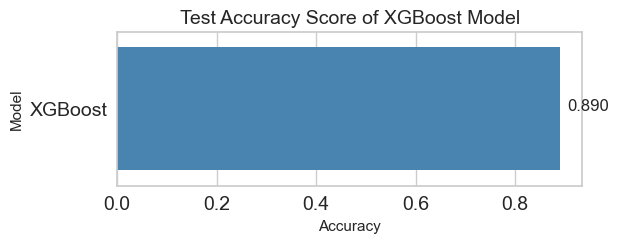

In [115]:
xgb_accuracy = xgb_gridmodel.score(X_test, y_test_encoded) 

compare = pd.DataFrame({
    "Model": ["XGBoost"],
    "Accuracy": [xgb_accuracy]
})

plt.figure(figsize=(6, 2))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.5),
                xytext=(5, 10), textcoords='offset points')

plt.yticks(size=14)
plt.xticks(size=14)
plt.title("Test Accuracy Score of XGBoost Model", size=14)
plt.show()

In [116]:
!pip install scikit-plot

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [117]:
# %pip install -U threadpoolctl to fix 'Nonetype has no attribute split' error.
# %pip install imbalanced-learn
# !pip install -U scikit-learn imbalanced-learn

In [118]:
print(y_train.value_counts())

Race
White       3034
Black       1038
Hispanic     543
Name: count, dtype: int64


In [119]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [120]:
sampling_strategy = {0: 3059, 1: 3059, 2: 3059}

over = SMOTE(sampling_strategy=sampling_strategy)
X_train_resampled, y_train_resampled = over.fit_resample(X_train, y_train_encoded)

steps = [('scaler', StandardScaler()), ("logistic", LogisticRegression(max_iter=1000))]

log_pipe_smote = Pipeline(steps=steps)

log_pipe_smote.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(max_iter=1000))])

In [121]:
y_train_resampled_series = pd.Series(y_train_resampled)

value_counts = y_train_resampled_series.value_counts()
print(value_counts)

2    3059
0    3059
1    3059
Name: count, dtype: int64


In [122]:
eval_metric(log_pipe_smote, X_train_resampled, y_train_resampled, X_test, y_test_encoded)

Test_Set
[[235  16   9]
 [  7 102  27]
 [ 11  75 672]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       260
           1       0.53      0.75      0.62       136
           2       0.95      0.89      0.92       758

    accuracy                           0.87      1154
   macro avg       0.80      0.85      0.82      1154
weighted avg       0.90      0.87      0.88      1154


Train_Set
[[2961   50   48]
 [  47 2755  257]
 [  52  302 2705]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3059
           1       0.89      0.90      0.89      3059
           2       0.90      0.88      0.89      3059

    accuracy                           0.92      9177
   macro avg       0.92      0.92      0.92      9177
weighted avg       0.92      0.92      0.92      9177



In [123]:
operations = [("scaler",StandardScaler()),("logistic", LogisticRegression(max_iter=1000))]

log_pipe_smote = Pipeline(steps=operations)

distributions = {
                "logistic__C": [0.1, 0.5],
                "logistic__penalty": ['l2', 'l1'],
                "logistic__solver": ["liblinear"] 
                 }

smote_gridmodel = RandomizedSearchCV(log_pipe_smote, distributions, scoring='accuracy', cv=10)
smote_gridmodel.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('logistic',
                                              LogisticRegression(max_iter=1000))]),
                   param_distributions={'logistic__C': [0.1, 0.5],
                                        'logistic__penalty': ['l2', 'l1'],
                                        'logistic__solver': ['liblinear']},
                   scoring='accuracy')

In [124]:
label_mapping = {'Black': 0, 'Hispanic': 1, 'White': 2}
y_test_encoded = y_test.map(label_mapping)

reverse_mapping = {0: 'Black', 1: 'Hispanic', 2: 'White'}
y_pred_labels = np.array([reverse_mapping[label] for label in y_pred])

In [125]:
eval_metric(smote_gridmodel, X_train_resampled, y_train_resampled, X_test, y_test_encoded)

Test_Set
[[240  12   8]
 [  6 105  25]
 [  8  73 677]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       260
           1       0.55      0.77      0.64       136
           2       0.95      0.89      0.92       758

    accuracy                           0.89      1154
   macro avg       0.82      0.86      0.83      1154
weighted avg       0.90      0.89      0.89      1154


Train_Set
[[2965   37   57]
 [  63 2710  286]
 [  55  286 2718]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3059
           1       0.89      0.89      0.89      3059
           2       0.89      0.89      0.89      3059

    accuracy                           0.91      9177
   macro avg       0.91      0.91      0.91      9177
weighted avg       0.91      0.91      0.91      9177



# Comparing Models

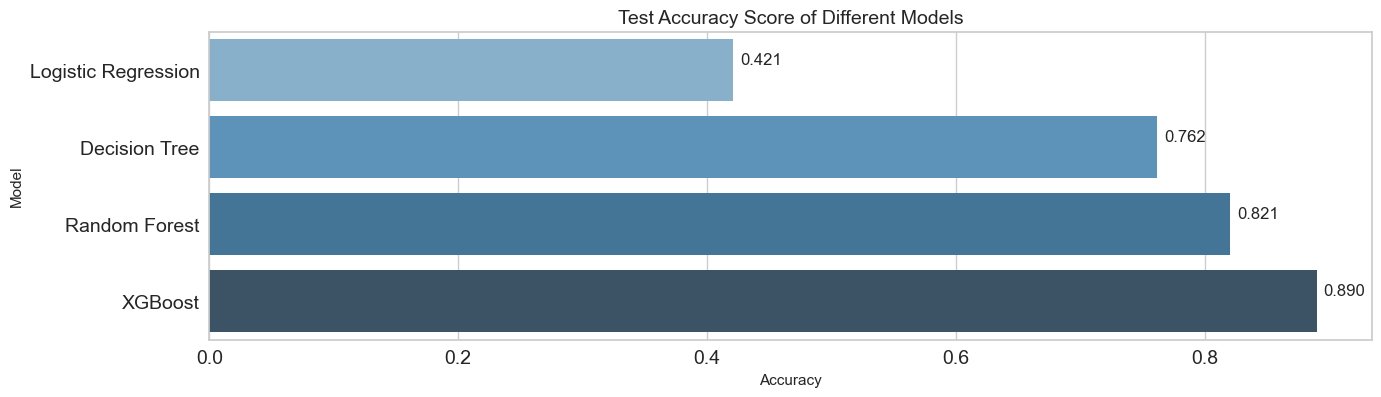

In [126]:
dt_accuracy = dt_gridmodel.score(X_test, y_test)            
rf_accuracy = rf_gridmodel.score(X_test, y_test)            
xgb_accuracy = xgb_gridmodel.score(X_test, y_test_encoded)  
log_accuracy = log_gridmodel.score(X_test, y_test)

dt_compare = pd.DataFrame({
    "Model": ["Decision Tree"],
    "Accuracy": [dt_accuracy]
})

rf_compare = pd.DataFrame({
    "Model": ["Random Forest"],
    "Accuracy": [rf_accuracy]
})

xgb_compare = pd.DataFrame({
    "Model": ["XGBoost"],
    "Accuracy": [xgb_accuracy]
})

log_compare = pd.DataFrame({
    "Model": ["Logistic Regression"],
    "Accuracy": [log_accuracy] 
})

compare = pd.concat([dt_compare, rf_compare, xgb_compare, log_compare], ignore_index=True)
compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(15, 4))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.5),
                xytext=(5, 10), textcoords='offset points')

plt.yticks(size=14)
plt.xticks(size=14)
plt.title("Test Accuracy Score of Different Models", size=14)
plt.show()

In [127]:
performance_metrics = []

# Logistic Regression
log_train_acc = accuracy_score(y_train, log_gridmodel.predict(X_train))
log_test_acc = log_gridmodel.score(X_test, y_test) 
log_f1 = f1_score(y_test, log_gridmodel.predict(X_test), average='weighted')
performance_metrics.append(['Logistic Regression', log_train_acc, log_test_acc, log_f1])

# Random Forest
rf_train_acc = accuracy_score(y_train, best_rf_model.predict(X_train))
rf_test_acc = accuracy_score(y_test, best_rf_model.predict(X_test))
rf_f1 = f1_score(y_test, best_rf_model.predict(X_test), average='weighted')
performance_metrics.append(['Random Forest', rf_train_acc, rf_test_acc, rf_f1])

# Decision Tree
dt_train_acc = accuracy_score(y_train, best_dt.predict(X_train))
dt_test_acc = accuracy_score(y_test, best_dt.predict(X_test))
dt_f1 = f1_score(y_test, best_dt.predict(X_test), average='weighted')
performance_metrics.append(['Decision Tree', dt_train_acc, dt_test_acc, dt_f1])

# XGBoost
xgb_train_acc = accuracy_score(y_train_encoded, xgb_model.predict(X_train))
xgb_test_acc = xgb_acc_test 
xgb_f1 = f1_score(y_test_encoded, y_pred, average='weighted')
performance_metrics.append(['XGBoost', xgb_train_acc, xgb_test_acc, xgb_f1])

performance_df = pd.DataFrame(performance_metrics, columns=['Model', 'Train Accuracy', 'Test Accuracy', 'F1 Score'])

print(performance_df)

                 Model  Train Accuracy  Test Accuracy  F1 Score
0  Logistic Regression        0.416685       0.421144  0.464436
1        Random Forest        1.000000       0.820624  0.783409
2        Decision Tree        0.898808       0.761698  0.746079
3              XGBoost        1.000000       0.889948  0.882637


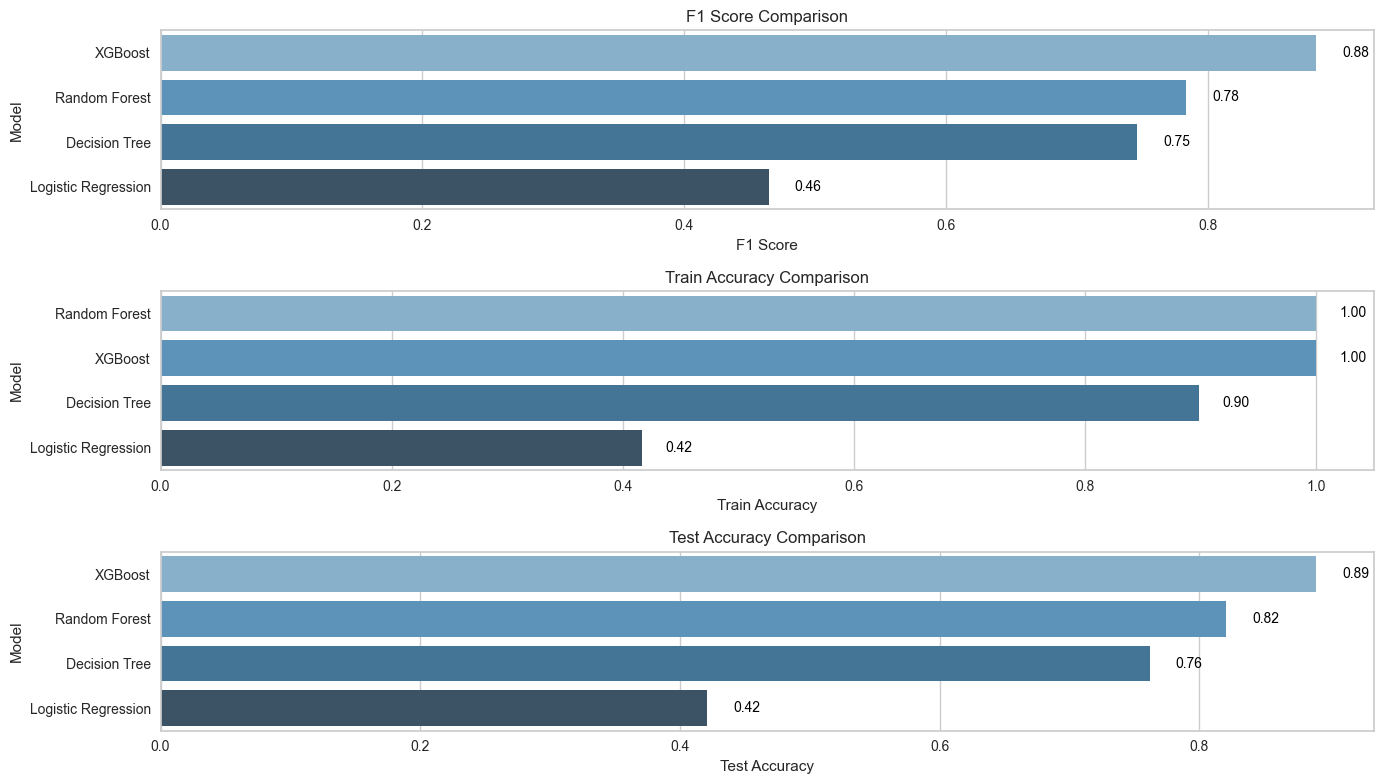

In [128]:
performance_df = pd.DataFrame(performance_metrics, columns=['Model', 'Train Accuracy', 'Test Accuracy', 'F1 Score'])

def labels(ax):
    for p in ax.patches:
        ax.annotate(f"{p.get_width():.2f}", (p.get_width() + 0.02, p.get_y() + p.get_height() / 2), 
                    va='center', fontsize=10, color='black')

plt.figure(figsize=(14, 8))

plt.subplot(311)
compare_f1 = performance_df.sort_values(by="F1 Score", ascending=False)
ax = sns.barplot(x="F1 Score", y="Model", data=compare_f1, palette="Blues_d")
labels(ax)
plt.title("F1 Score Comparison")

plt.subplot(312)
compare_train_acc = performance_df.sort_values(by="Train Accuracy", ascending=False)
ax = sns.barplot(x="Train Accuracy", y="Model", data=compare_train_acc, palette="Blues_d")
labels(ax)
plt.title("Train Accuracy Comparison")

plt.subplot(313)
compare_test_acc = performance_df.sort_values(by="Test Accuracy", ascending=False)
ax = sns.barplot(x="Test Accuracy", y="Model", data=compare_test_acc, palette="Blues_d")
labels(ax)
plt.title("Test Accuracy Comparison")

plt.tight_layout()
plt.show()

In [129]:
### THANK YOUUU (special thanks to Beyonce :)